# Linear Regression

- Evalulating performance
- Regularization
- Beyond lines
 - Polynomial
 - Decision Tree
 - Random Forests

## Evalulating your linear regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/housing/housing.data',
                  header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [4]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

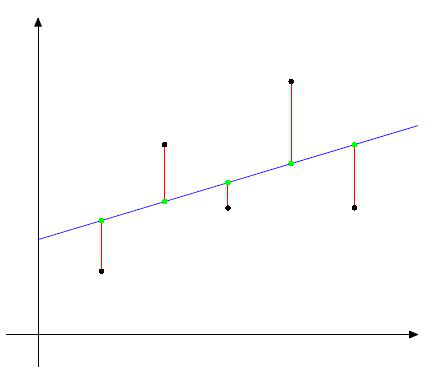

In [5]:
from PIL import Image
Image.open('/Users/oisin-brogan/Downloads/linear_errors.jpg')

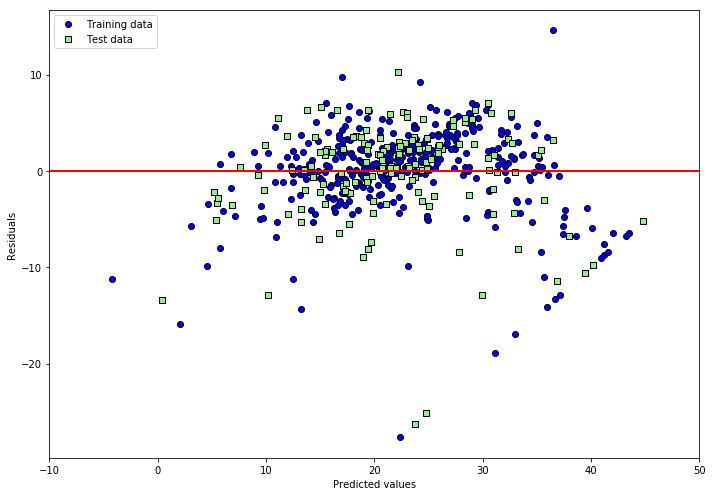

In [6]:
fig = plt.figure(figsize=(10,7))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data',edgecolors='black')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data',edgecolors='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

MSE (mean squared error):
\begin{align}
MSE = \frac{1}{n} \sum^{n}_{i=1} (y^{(i)} - \hat{y}^{(i)})^2
\end{align}

R-squared (coefficeient of determination):
\begin{align}
R^2 = 1 - \frac{SSE}{SST}
\end{align}

where $SSE$ is Sum of Squared Errors, like $MSE$ but sum instead of mean, and $SST$ is the Total Sum of Squares, $\sum^{n}_{i=1} (y^{(i)} - \mu_y)^2$.

Note $SST$ is the varience of the indepentant variable

\begin{align}
RMSE = \sqrt{{\frac{1}{n} \sum^{n}_{i=1} (y^{(i)} - \hat{y}^{(i)})^2}}
\end{align}

$R^2$ is simply a scaled version of MSE, as shown below:
\begin{align}
R^2 = 1 - \frac{SSE}{SST}
\end{align}

\begin{align}
 = 1 - \frac{\frac{1}{n} \sum^{n}_{i=1} (y^{(i)} - \hat{y}^{(i)})^2}{\frac{1}{n} \sum^{n}_{i=1} (y^{(i)} - \mu_y^{(i)})^2}
\end{align}

\begin{align}
 = 1 - \frac{MSE}{Var(y)}
\end{align}

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


## Avoiding Overfitting with Regularization

We want to penalize model complexity.

We can do this by limiting the size of the parameter values by introducing a penalty.

Three most popular of these kind of approaches are **Ridge Regression**, **LASSO** and **Elastic Net**.

### Ridge Regression

Ridge regression modifies the cost function of ordinary least squares regression to include the squared sum of the weights, i.e.

\begin{align}
J(w)_{ridge} = \sum^{n}_{i=1} (y^{(i)} - \hat{y}^{(i)})^2 + \lambda \|w\|^2_2
\end{align}

Where

\begin{align}
L2 : \|w\|^2_2 = \sum^{m}_{j=1} w_j ^2
\end{align}

Note we don't regularized $w_{0}$, the intercept term

### LASSO

Least Absolute Shrinkage (LASSO) modifies the cost function to include the absolute value of the weights, i.e.

\begin{align}
J(w)_{LASSO} = \sum^{n}_{i=1} (y^{(i)} - \hat{y}^{(i)})^2 + \lambda \|w\|_1
\end{align}

Where

\begin{align}
L1 : \|w\|_1 = \sum^{m}_{j=1} |w_j|
\end{align}

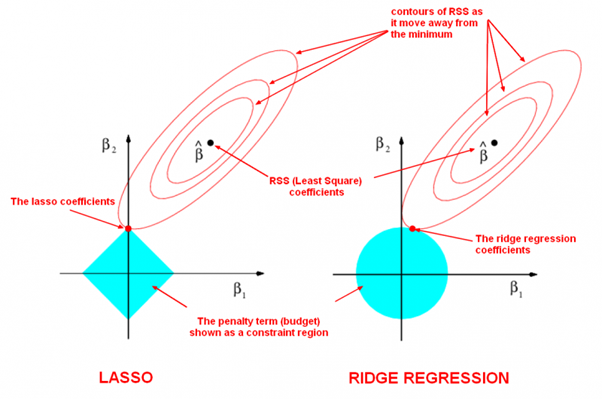

In [8]:
Image.open('/Users/oisin-brogan/Downloads/lasso_vs_ridge.png')

### Elastic Net

Elastic net is a compromise between Ridge and LASSO, and includes both squared and absolute values in the cost function

\begin{align}
J(w)_{Elastic Net} = \sum^{n}_{i=1} (y^{(i)} - \hat{y}^{(i)})^2 + \lambda_1 \|w\|^2_2 + \lambda_2 \|w\|_1
\end{align}

Where

\begin{align}
L1 : \|w\|_1 = \sum^{m}_{j=1} |w_j|
\end{align}

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.5)

ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.370, test: 25.363
R^2 train: 0.745, test: 0.719


In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)

lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 22.537, test: 29.553
R^2 train: 0.718, test: 0.673


In [11]:
from sklearn.linear_model import ElasticNet
e_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
#Skikit learn allows us to tune the ratio between lambda 1 and lambda 2, rather then directly
#For example, setting the ratio to one is the same as LASSO
e_net.fit(X_train, y_train)
y_train_pred = e_net.predict(X_train)
y_test_pred = e_net.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 24.381, test: 31.874
R^2 train: 0.712, test: 0.617


## Polynomial Regression

We try to model the relationship between explanatory and response variables as a some polynominal relationship:

\begin{align}
y = w_0 + w_1x + w_2x^2 + \ldots + w_dx^d
\end{align}

Note that this is still linear regression, in the sense the weights/coefficents are still linear combinations.

${\begin{bmatrix}y_{1}\\y_{2}\\y_{3}\\\vdots \\y_{n}\end{bmatrix}}={\begin{bmatrix}1&x_{1}&x_{1}^{2}&\dots &x_{1}^{d}\\1&x_{2}&x_{2}^{2}&\dots &x_{2}^{d}\\1&x_{3}&x_{3}^{2}&\dots &x_{3}^{d}\\\vdots &\vdots &\vdots &&\vdots \\1&x_{n}&x_{n}^{2}&\dots &x_{n}^{d}\end{bmatrix}}{\begin{bmatrix}w_{0}\\w_{1}\\w_{2}\\\vdots \\w_{d}\end{bmatrix}}+{\begin{bmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\varepsilon _{3}\\\vdots \\\varepsilon _{n}\end{bmatrix}}$

In [24]:
X = pd.np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, pd.np.newaxis]

y = pd.np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

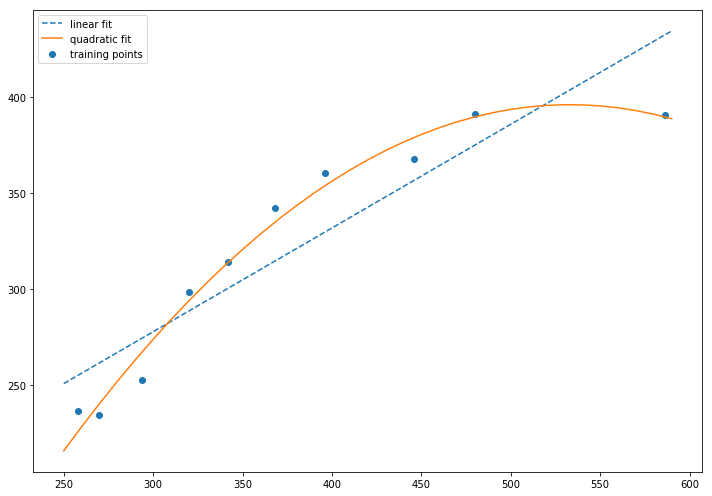

In [13]:
# fit linear features
lr.fit(X, y)
X_fit = pd.np.arange(250, 600, 10)[:, pd.np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
fig = plt.figure(figsize=(10,7))
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()

In [14]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (
            mean_squared_error(y, y_lin_pred),
            mean_squared_error(y, y_quad_pred)))
print('Training  R^2 linear: %.3f, quadratic: %.3f' % (
            r2_score(y, y_lin_pred),
            r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training  R^2 linear: 0.832, quadratic: 0.982


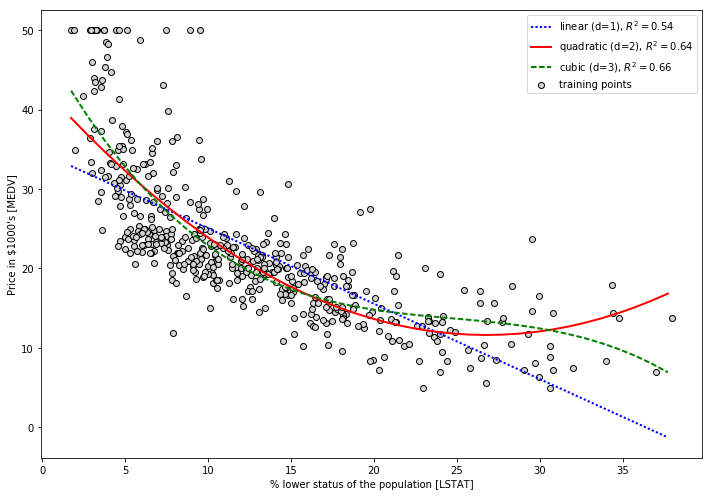

In [15]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
fig = plt.figure(figsize=(10,7))
plt.scatter(X, y, label='training points', color='lightgray',edgecolors='black')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()

## Regression with Decision Trees

Simplest regression model is just to predict the mean, $\bar{y}$ of the dependant variable.

For regression, a decision tree tries to find the split of the data (based on the explanatory variables) which minizes the MSE for this simple prediciton. 

Put more formally, we try to find the split to maximize the Information Gain (IG)

\begin{align}
IG(D_p, x) = I(D_p) - \frac{1}{N_p}I(D_l) + I(D_r)
\end{align}

Where, $x$ is the feature to perform the split, $N_p$ is the number of samples in the parent node, $I$ is the impurity function, $D_p$ is the subset of training samples in the parent node, and $D_l$ and $D_r$ are the subsets of training samples in the left and right child node after the split.

For classification, we defined the number of misclassified points as the impurity function. For regression we define it to be the MSE:

\begin{align}
I(t) = MSE(t) = \frac{1}{N_t}\sum_{i \in D_t} (y_i - \bar{y_t})^2
\end{align}

The MSE defined here, when the predictor is the mean of the sample, is also know as _within group variance_, or within-node varience when discussing decision trees.

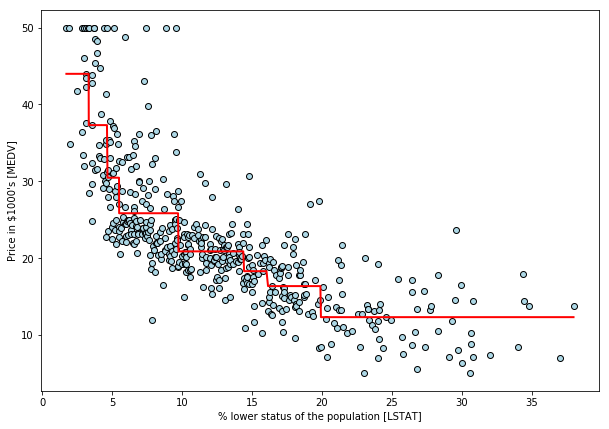

In [25]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue',edgecolors='black')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

fig = plt.figure(figsize=(10,7))
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')

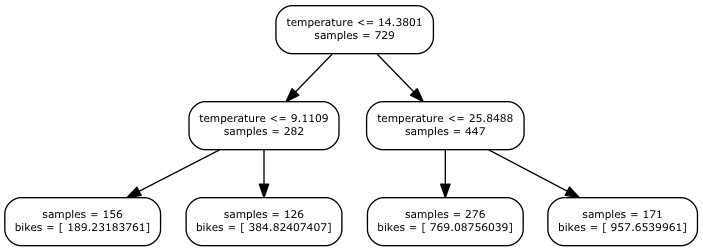

In [17]:
#from sklearn.tree import export_graphviz
#export_graphviz(regressor, out_file='tree.dot', feature_names=['temperature'])
Image.open('/Users/oisin-brogan/Downloads/regtree3.png')

## Random Forests

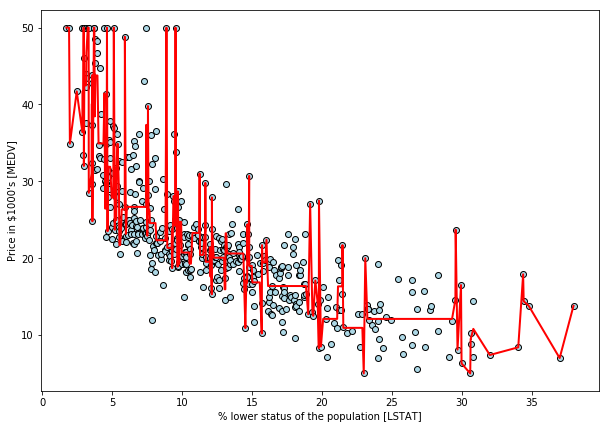

In [18]:
tree = DecisionTreeRegressor(max_depth=8)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

fig = plt.figure(figsize=(10,7))
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')

In [19]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


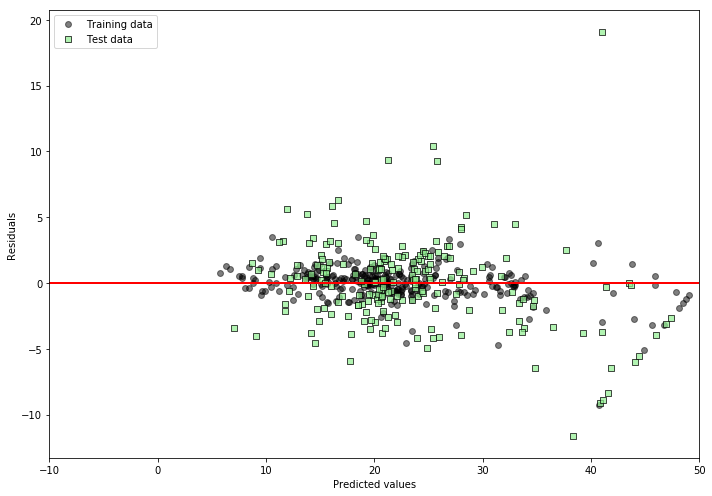

In [21]:
fig = plt.figure(figsize=(10,7))
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            linewidths = 1,
            s=35,
            alpha=0.5,
            label='Training data',
           edgecolors='black')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            linewidths = 1,
            s=35,
            alpha=0.7,
            label='Test data',
            edgecolors='black')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

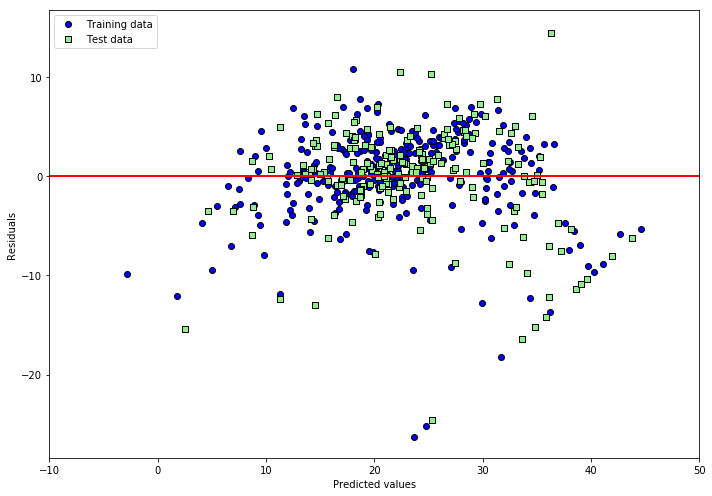

In [22]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

fig = plt.figure(figsize=(10,7))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data',edgecolors='black')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data',edgecolors='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()